In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
data.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,pretentious,proper,foster,1,less_conv,inconv,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
xn = data.iloc[:, 0:8]
xn.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority


In [6]:
yn = data.iloc[:, -1]
yn.head()

0    recommend
1     priority
2    not_recom
3    recommend
4     priority
Name: class, dtype: object

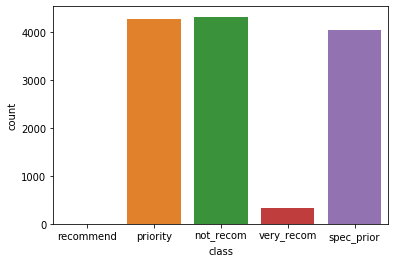

In [7]:
plot_class = sns.countplot(yn)

In [8]:
yn.value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: class, dtype: int64

In [9]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size = 0.3)

In [10]:
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
12303,great_pret,very_crit,complete,more,critical,inconv,nonprob,recommended
7085,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom
8678,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom
923,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom
4170,usual,very_crit,foster,2,convenient,inconv,slightly_prob,recommended


In [11]:
pqr = xn_train
pqr['class'] = yn_train

C:\Users\Athashree\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
pqr.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
12303,great_pret,very_crit,complete,more,critical,inconv,nonprob,recommended,spec_prior
7085,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom,not_recom
8678,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom,not_recom
923,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
4170,usual,very_crit,foster,2,convenient,inconv,slightly_prob,recommended,spec_prior


In [13]:
yn_train.value_counts()

not_recom     2998
priority      2975
spec_prior    2862
very_recom     235
recommend        2
Name: class, dtype: int64

In [14]:
datan_1 = pqr[pqr['class']=='very_recom']  
datan_1.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
2109,usual,improper,completed,more,convenient,convenient,slightly_prob,recommended,very_recom
5781,pretentious,less_proper,incomplete,more,convenient,convenient,slightly_prob,recommended,very_recom
594,usual,proper,incomplete,more,convenient,convenient,nonprob,recommended,very_recom
918,usual,less_proper,complete,2,convenient,convenient,nonprob,recommended,very_recom
5628,pretentious,less_proper,incomplete,1,convenient,inconv,slightly_prob,recommended,very_recom


In [15]:
datan_2 = pqr[pqr['class']== 'recommend']
datan_2.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend


In [16]:
datan_n = pqr[pqr['class']== 'priority']
datan_n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
2023,usual,improper,completed,2,less_conv,convenient,problematic,priority,priority
70,usual,proper,complete,2,convenient,inconv,problematic,priority,priority
1690,usual,less_proper,foster,more,convenient,inconv,problematic,priority,priority
1981,usual,improper,completed,1,critical,convenient,nonprob,priority,priority
4378,pretentious,proper,complete,2,convenient,convenient,slightly_prob,priority,priority


In [17]:
datan_n = datan_n.append(datan_1) #appending very_reco
datan_n.tail()

,parents,has_nurs,form,children,housing,finance,social,health,class
5637,pretentious,less_proper,incomplete,1,less_conv,convenient,slightly_prob,recommended,very_recom
945,usual,less_proper,complete,2,less_conv,inconv,nonprob,recommended,very_recom
1749,usual,improper,complete,1,less_conv,convenient,slightly_prob,recommended,very_recom
2214,usual,improper,incomplete,2,convenient,convenient,nonprob,recommended,very_recom
4971,pretentious,proper,foster,1,convenient,convenient,slightly_prob,recommended,very_recom


In [18]:
datan_n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3210,3210,3210,3210,3210,3210,3210,3210,3210
unique,3,5,4,4,3,2,3,2,2
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,priority
freq,1485,1039,875,944,1286,1747,1201,1904,2975


In [19]:
xn1 = datan_n.iloc[:, 0:8]
yn1 = datan_n.iloc[:, -1]

In [20]:
oversampler = RandomOverSampler()
xn1_resampled, yn1_resampled = oversampler.fit_resample(xn1, yn1)

In [21]:
data2n_final = pd.DataFrame(xn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7
0,usual,improper,completed,2,less_conv,convenient,problematic,priority
1,usual,proper,complete,2,convenient,inconv,problematic,priority
2,usual,less_proper,foster,more,convenient,inconv,problematic,priority
3,usual,improper,completed,1,critical,convenient,nonprob,priority
4,pretentious,proper,complete,2,convenient,convenient,slightly_prob,priority


In [22]:
data2n_final['class']=pd.DataFrame(yn1_resampled)
data2n_final.head()

,0,1,2,3,4,5,6,7,class
0,usual,improper,completed,2,less_conv,convenient,problematic,priority,priority
1,usual,proper,complete,2,convenient,inconv,problematic,priority,priority
2,usual,less_proper,foster,more,convenient,inconv,problematic,priority,priority
3,usual,improper,completed,1,critical,convenient,nonprob,priority,priority
4,pretentious,proper,complete,2,convenient,convenient,slightly_prob,priority,priority


In [23]:
data2n_final.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data2n_final.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,improper,completed,2,less_conv,convenient,problematic,priority,priority
1,usual,proper,complete,2,convenient,inconv,problematic,priority,priority
2,usual,less_proper,foster,more,convenient,inconv,problematic,priority,priority
3,usual,improper,completed,1,critical,convenient,nonprob,priority,priority
4,pretentious,proper,complete,2,convenient,convenient,slightly_prob,priority,priority


In [24]:
data2n = pqr[pqr['class']== 'not_recom']
data2n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
7085,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom,not_recom
8678,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom,not_recom
923,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
5186,pretentious,less_proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4610,pretentious,proper,completed,2,less_conv,convenient,nonprob,not_recom,not_recom


In [25]:
data2n = data2n.append(datan_2)
data2n.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3,5,4,4,3,2,3,2,2
top,great_pret,less_proper,completed,1,convenient,convenient,nonprob,not_recom,not_recom
freq,1019,611,762,771,1019,1507,1025,2998,2998


In [26]:
x1n = data2n.iloc[:, 0:8]
x1n.head()

,parents,has_nurs,form,children,housing,finance,social,health
7085,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom
8678,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom
923,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom
5186,pretentious,less_proper,complete,1,convenient,convenient,nonprob,not_recom
4610,pretentious,proper,completed,2,less_conv,convenient,nonprob,not_recom


In [27]:
y1n = data2n.iloc[:,-1]
y1n.head()

7085    not_recom
8678    not_recom
923     not_recom
5186    not_recom
4610    not_recom
Name: class, dtype: object

In [28]:
x1_resampled, y1_resampled = oversampler.fit_resample(x1n, y1n)

In [29]:
data22n = pd.DataFrame(x1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7
0,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom
1,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom
2,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom
3,pretentious,less_proper,complete,1,convenient,convenient,nonprob,not_recom
4,pretentious,proper,completed,2,less_conv,convenient,nonprob,not_recom


In [30]:
data22n['class']=pd.DataFrame(y1_resampled)
data22n.head()

,0,1,2,3,4,5,6,7,class
0,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom,not_recom
1,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom,not_recom
2,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,pretentious,less_proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,pretentious,proper,completed,2,less_conv,convenient,nonprob,not_recom,not_recom


In [31]:
data22n.columns=['parents','has_nurs','form','children','housing','finance','social','health','class']
data22n.head()

,parents,has_nurs,form,children,housing,finance,social,health,class
0,pretentious,critical,complete,more,convenient,inconv,nonprob,not_recom,not_recom
1,great_pret,proper,complete,1,critical,convenient,nonprob,not_recom,not_recom
2,usual,less_proper,complete,2,convenient,convenient,slightly_prob,not_recom,not_recom
3,pretentious,less_proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,pretentious,proper,completed,2,less_conv,convenient,nonprob,not_recom,not_recom


In [32]:
data2n_final = data2n_final.append(data22n)

In [33]:
data2n_final = data2n_final. append(pqr[pqr['class']== 'spec_prior'])

In [34]:
data2n_final.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,14808,14808,14808,14808,14808,14808,14808,14808,14808
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
freq,7611,5960,6313,6510,7780,9284,5943,8768,2998


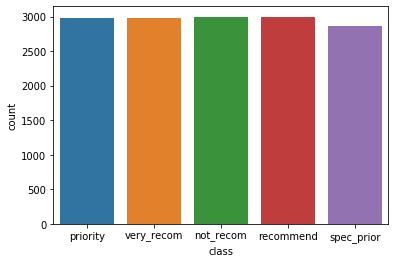

In [35]:
plot_class = sns.countplot(x="class", data= data2n_final)

In [36]:
xn_train = data2n_final.iloc[:,0:8]
xn_train.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,usual,improper,completed,2,less_conv,convenient,problematic,priority
1,usual,proper,complete,2,convenient,inconv,problematic,priority
2,usual,less_proper,foster,more,convenient,inconv,problematic,priority
3,usual,improper,completed,1,critical,convenient,nonprob,priority
4,pretentious,proper,complete,2,convenient,convenient,slightly_prob,priority


In [37]:
xn_train = pd.get_dummies(xn_train)

In [38]:
xn_train.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,0,0,1,0,1,0,0,0,0,1,...,0,1,1,0,0,1,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [39]:
yn_train = data2n_final.iloc[:,-1]
yn_train.head()

0    priority
1    priority
2    priority
3    priority
4    priority
Name: class, dtype: object

In [40]:
yn_train = pd.DataFrame(yn_train)
yn_train.head()

,class
0,priority
1,priority
2,priority
3,priority
4,priority


In [41]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_train['class'] = [rep_val[i] for i in yn_train['class']]

In [42]:
yn_train.head()

,class
0,1
1,1
2,1
3,1
4,1


In [43]:
xn_test = pd.get_dummies(xn_test)
xn_test.head()

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
8033,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,1,1,0,0
6832,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
3886,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
3459,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
530,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [44]:
yn_test

8033      not_recom
6832     spec_prior
3886     spec_prior
3459       priority
530       not_recom
            ...    
11547    spec_prior
7160      not_recom
11650    spec_prior
7345     spec_prior
11768     not_recom
Name: class, Length: 3888, dtype: object

In [45]:
yn_test = pd.DataFrame(yn_test)
yn_test

,class
8033,not_recom
6832,spec_prior
3886,spec_prior
3459,priority
530,not_recom
...,...
11547,spec_prior
7160,not_recom
11650,spec_prior
7345,spec_prior


In [46]:
rep_val = {'priority':1,'spec_prior':2,'not_recom':3,'very_recom':4,'recommend':5}
yn_test['class'] = [rep_val[i] for i in yn_test['class']]

In [47]:
yn_test.head()

,class
8033,3
6832,2
3886,2
3459,1
530,3


# Decision Tree Classifier

In [48]:
dt2n_training = np.tile(0., 27)
dt2n_testing = np.tile(0., 27)
print("depth | Training score    | Testing score")
for i in range (1,27):
    print(i,end="   |   ")
    dt2 = tree.DecisionTreeClassifier(max_depth=i,criterion = 'entropy')
    dt2.fit(xn_train, yn_train)
    score1 = dt2.score(xn_train,yn_train)
    dt2n_training[i] = score1.mean()
    print(round(dt2n_training[i],5), end = "         |  ")
    #dt2.fit(xnf_test, ynf_test)
    score2 = dt2.score(xn_test,yn_test)
    dt2n_testing[i] = score2.mean()
    print(round(dt2n_testing[i],5))
    

depth | Training score    | Testing score
1   |   0.40492         |  0.34002
2   |   0.58583         |  0.62629
3   |   0.68105         |  0.53524
4   |   0.76877         |  0.64763
5   |   0.82449         |  0.78395
6   |   0.89472         |  0.82639
7   |   0.93193         |  0.88709
8   |   0.94895         |  0.91178
9   |   0.96556         |  0.92593
10   |   0.9794         |  0.95653
11   |   0.98953         |  0.96579
12   |   0.99534         |  0.98251
13   |   0.99892         |  0.99074
14   |   1.0         |  0.99331
15   |   1.0         |  0.99306
16   |   1.0         |  0.99408
17   |   1.0         |  0.99563
18   |   1.0         |  0.99434
19   |   1.0         |  0.99254
20   |   1.0         |  0.9946
21   |   1.0         |  0.99306
22   |   1.0         |  0.99614
23   |   1.0         |  0.99486
24   |   1.0         |  0.99357
25   |   1.0         |  0.9928
26   |   1.0         |  0.9946


In [49]:
dt2n_training=dt2n_training[dt2n_training!=0.]
dt2n_testing=dt2n_testing[dt2n_testing!=0.]
xaxis2 = array.array('i',(i for i in range(1,27)))

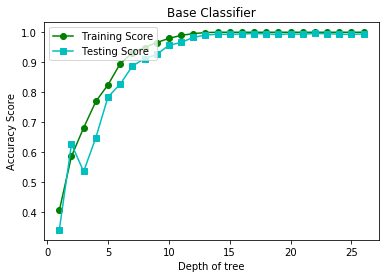

In [50]:
fig5, p5 = plt.subplots()
plt.plot(xaxis2, dt2n_training,'go-', Label='Training Score')
plt.plot(xaxis2, dt2n_testing,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier')
legend = p5.legend(loc='upper left')

Oversampling hasn't caused the model to overfit in this case. 